In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_all = pd.read_csv('train_mdf.csv')

(Pipeline 작업 필요)

In [3]:
df = df_all.drop(['Id'], axis=1, inplace=False)

# Data Preprocessing

## Missing Value, None, NaN 처리
- delete col : 
- object 'None' or 'NA' : 
    - Alley (NA - No alley access)
    - MasVnrType (None - None)
    - MiscFeature (NA - None)
- int 0 : 
    - LotFrontage
    - MasVnrArea
    - BsmtQual, BsmtCond (Likert object -> int, NA - No Basement),  
      BsmtExposure, BsmtFinType1, BsmtFinType2 (NA - No Basement)
    - FireplaceQu (Likert object -> int, NA - No Fireplace)
    - GarageType, GarageFinish, (NA - No Garage), GarageYrBlt,  
      GarageQual, GarageCond (Likert object -> int, NA - No Garage)  
    - PoolQC (Likert object -> int, NA - No Pool)
    - Fence (NA - No Fence)
- mode : Electrical    

In [4]:
# int 0 처리
df[['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']] \
= df[['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 
    'PoolQC', 'Fence']].fillna(0)

In [5]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [6]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [7]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

MiscFeature    1406
Alley          1369
MasVnrType        8
Electrical        1
dtype: int64

In [5]:
df[['Alley', 'MasVnrType', 'MiscFeature']] \
= df[['Alley', 'MasVnrType', 'MiscFeature']].fillna(value = 'None')

In [9]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Electrical    1
dtype: int64

In [6]:
df['Electrical'] = df['Electrical'].fillna(value = 'SBrkr')

In [11]:
df['Electrical'].mode()

0    SBrkr
dtype: object

In [12]:
df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [13]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
# 값이 없으면 Series([], dtype: int64) 출력

Series([], dtype: int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Feature Scale 파악 및 변환
dtype과 실제 scale 특성 매치  
 - MSSubClass : int -> cat

### - int -> object

In [ ]:
# df['MSSubClass'].astype(str)

In [7]:
# int -> str : MSSubClass 
df = df.astype({'MSSubClass': 'str'})
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### -  Likert Scale : object -> int
- ExterQual, ExterCond
- BsmtQual, BsmtCond
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageQual, GarageCond
- PoolQC

- ExterQual, ExterCond
- BsmtQual, BsmtCond
- HeatingQC, PoolQC
- KitchenQual, FireplaceQu
- GarageQual, GarageCond

In [8]:
# ExterQual, ExterCond, 
df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
   'GarageQual', 'GarageCond', 'PoolQC']] \
= df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
   'GarageQual', 'GarageCond', 'PoolQC']].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po' : 1})

In [17]:
df['BsmtCond'].value_counts()

3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

In [18]:
# PoolQC
df['PoolQC'].value_counts()

0    1453
4       3
2       2
5       2
Name: PoolQC, dtype: int64

In [ ]:
# df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond']].value_counts()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
# Label Encoding

# ExterQual, ExterCond 
# BsmtQual, BsmtCond

In [20]:
df.dtypes.value_counts()

int64      43
object     34
float64     3
dtype: int64

In [9]:
cat = df.select_dtypes("object").columns

print(len(cat))
cat

34


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
# Numerical Features including SalePrice (int64 & float64)
tNum = df.select_dtypes(exclude = 'object').columns

print(len(tNum))
tNum

46


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [11]:
# Numerical Features excluding SalePrice (int64 & float64)
num = tNum[:-1]

print(len(num))
num

45


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [12]:
tNum_df = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

In [25]:
tNum_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,61,0,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,42,0,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,35,272,0,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,84,0,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,3,3,4,...,40,0,0,0,0,0,0,8,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,3,3,4,...,0,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,5,4,3,...,60,0,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,3,3,3,...,0,112,0,0,0,0,0,4,2010,142125


# Data Analysis

## SalePrice Prediction with Numerical Variables

### 1. Simple Linear Regression

In [52]:
tNum_df.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,61,0,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,42,0,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,35,272,0,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,84,0,0,0,0,0,0,12,2008,250000
5,85.0,14115,5,5,1993,1995,0.0,3,3,4,...,30,0,320,0,0,0,700,10,2009,143000
6,75.0,10084,8,5,2004,2005,186.0,4,3,5,...,57,0,0,0,0,0,0,8,2007,307000
7,0.0,10382,7,6,1973,1973,240.0,3,3,4,...,204,228,0,0,0,0,350,11,2009,200000
8,51.0,6120,7,5,1931,1950,0.0,3,3,3,...,0,205,0,0,0,0,0,4,2008,129900
9,50.0,7420,5,6,1939,1950,0.0,3,3,3,...,4,0,0,0,0,0,0,1,2008,118000


In [13]:
from sklearn.model_selection import train_test_split

y = df['SalePrice']
X = tNum_df.drop(['SalePrice'], axis=1, inplace=False) # all numerical variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 45), (292, 45), (1168,), (292,))

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('RMSE = {0: .4f} \nR^2 = {1: .4f}'.format(rmse, r2_score(y_test, y_preds)))

RMSE =  35274.2089 
R^2 =  0.8378


In [15]:
lr.intercept_, lr.coef_

(484132.01016219764,
 array([ 1.57372142e+01,  4.70079345e-01,  1.20311313e+04,  5.60749330e+03,
         2.04753681e+02, -8.47692789e+01,  1.90307771e+01,  1.15948563e+04,
        -1.89184755e+03,  9.55563408e+03, -8.33734299e+03,  6.84417446e+00,
         3.68226387e-01, -2.07686932e+00,  5.13553153e+00,  1.20842581e+03,
         1.95464031e+01,  9.97035128e+00, -6.31021392e+00,  2.32065405e+01,
         8.89079229e+03, -8.67103452e+02,  1.71520847e+03,  8.28903774e+02,
        -4.36953472e+03, -2.24309320e+04,  1.05999758e+04,  4.98427108e+03,
         1.95754994e+03,  1.26574429e+03, -2.27181694e+01,  1.44067285e+04,
         9.56985746e+00,  1.16099089e+04, -5.39929963e+03,  2.17673701e+01,
        -1.46376094e+01,  8.02593658e+00,  4.57839766e+01,  6.07414642e+01,
        -2.51470533e+01, -1.60322209e+03,  8.41919363e-01,  3.62564127e+00,
        -4.08017463e+02]))

In [16]:
coef = pd.Series(data=np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending=False)

GarageCars       14406.73
OverallQual      12031.13
GarageQual       11609.91
ExterQual        11594.86
KitchenQual      10599.98
BsmtQual          9555.63
BsmtFullBath      8890.79
OverallCond       5607.49
TotRmsAbvGrd      4984.27
Fireplaces        1957.55
FullBath          1715.21
FireplaceQu       1265.74
HeatingQC         1208.43
HalfBath           828.90
YearBuilt          204.75
ScreenPorch         60.74
3SsnPorch           45.78
GrLivArea           23.21
WoodDeckSF          21.77
1stFlrSF            19.55
MasVnrArea          19.03
LotFrontage         15.74
2ndFlrSF             9.97
GarageArea           9.57
EnclosedPorch        8.03
BsmtFinSF1           6.84
TotalBsmtSF          5.14
MoSold               3.63
MiscVal              0.84
LotArea              0.47
BsmtFinSF2           0.37
BsmtUnfSF           -2.08
LowQualFinSF        -6.31
OpenPorchSF        -14.64
GarageYrBlt        -22.72
PoolArea           -25.15
YearRemodAdd       -84.77
YrSold            -408.02
BsmtHalfBath

In [48]:
'''
from sklearn.model_selection import cross_val_score

y = df['SalePrice']
X = tNum_df.drop(['SalePrice'], axis=1, inplace=False)

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=7)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('7 Folds RMSE = ', np.round(rmse_scores, 2)) 
print('7 Folds Average RMSE = {0: .4f}'.format(avg_rmse))
'''

7 Folds RMSE =  [27528.36 26299.11 37293.05 38616.55 26269.57 51307.23 56697.45]
7 Folds Average RMSE =  37715.9043


### 2. Regularized Linear Regression

In [82]:
# Ridge Regression (RidgeCV 사용법 찾아보기)

from sklearn.linear_model import Ridge

y = df['SalePrice']
X = tNum_df.drop(['SalePrice'], axis=1, inplace=False)

ridge = Ridge(alpha=10)

neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=7)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('7 Folds RMSE = ', np.round(rmse_scores, 2)) 
print('7 Folds Average RMSE = {0: .4f}'.format(avg_rmse))

7 Folds RMSE =  [27492.74 26246.39 37284.23 38593.54 26178.17 47116.54 56341.18]
7 Folds Average RMSE =  37036.1125


In [78]:
ridge_alphas = [0, 0.1, 1, 10, 100, 1000]

for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=7)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha = {0} 7 Folds Average RMSE = {1: .4f}'.format(alpha, avg_rmse))

alpha = 0 7 Folds Average RMSE =  37766.3044
alpha = 0.1 7 Folds Average RMSE =  37700.4166
alpha = 1 7 Folds Average RMSE =  37577.1772
alpha = 10 7 Folds Average RMSE =  37036.1125
alpha = 100 7 Folds Average RMSE =  36659.9094
alpha = 1000 7 Folds Average RMSE =  37938.3467


In [86]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [87]:
coef = pd.Series(data=np.round(ridge.coef_, 2), index = X.columns)
coef.sort_values(ascending=False)

OverallQual      12361.80
KitchenQual       8880.54
ExterQual         8492.31
GarageCars        7655.75
BsmtQual          7146.51
BsmtFullBath      4964.13
OverallCond       4811.42
TotRmsAbvGrd      3382.96
GarageQual        2643.81
FireplaceQu       2280.82
HeatingQC         1661.73
Fireplaces         863.37
YearBuilt          275.85
HalfBath           193.14
FullBath           180.56
ScreenPorch         65.97
3SsnPorch           47.32
GrLivArea           27.76
GarageArea          27.14
WoodDeckSF          24.20
MasVnrArea          20.27
1stFlrSF            18.83
YearRemodAdd        17.39
LotFrontage         15.81
EnclosedPorch       11.43
2ndFlrSF             9.23
BsmtFinSF1           8.10
TotalBsmtSF          4.93
BsmtFinSF2           0.52
LotArea              0.49
MiscVal              0.24
LowQualFinSF        -0.30
BsmtUnfSF           -3.68
OpenPorchSF         -8.25
GarageYrBlt        -14.62
PoolArea           -34.11
MoSold             -83.42
GarageCond        -296.32
YrSold      

In [90]:
# coefficient visualization
coeff = pd.Series(data=ridge.coef_ , index=X.columns)
sort_column = 'alpha:'+str(ridge_alphas[0])

coeff_df = pd.DataFrame()
coeff_df[sort_column] = coeff
coeff_df.sort_values(by=sort_column, ascending=False)
coeff_df

,alpha:0
LotFrontage,15.809207
LotArea,0.491150
OverallQual,12361.795711
OverallCond,4811.423432
YearBuilt,275.851504
YearRemodAdd,17.390962
MasVnrArea,20.273841
ExterQual,8492.314612
ExterCond,-1152.404640
BsmtQual,7146.512100


In [80]:
sort_column = 'alpha' + str(lasso_alphas[0])
coef_lasso_df.sort_values(by=sort_column, ascending=False)

NameError: name 'coef_lasso_df' is not defined

In [77]:
# Lasso Regression

from sklearn.linear_model import Lasso

y = df['SalePrice']
X = tNum_df.drop(['SalePrice'], axis=1, inplace=False)

lasso_alphas = [0, 0.1, 1, 10, 100, 1000, 10000, 100000]

for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha)
    
    neg_mse_scores = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=7)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha = {0} 7 Folds Average RMSE = {1: .4f}'.format(alpha, avg_rmse))

alpha = 0 7 Folds Average RMSE =  37715.9043
alpha = 0.1 7 Folds Average RMSE =  37715.5770
alpha = 1 7 Folds Average RMSE =  37712.6404
alpha = 10 7 Folds Average RMSE =  37684.0758
alpha = 100 7 Folds Average RMSE =  37418.2233
alpha = 1000 7 Folds Average RMSE =  36910.1675
alpha = 10000 7 Folds Average RMSE =  40135.1589
alpha = 100000 7 Folds Average RMSE =  41908.5897


In [ ]:
# Elastic Regression

from sklearn.linear_model import Lasso

y = df['SalePrice']
X = tNum_df.drop(['SalePrice'], axis=1, inplace=False)

alphas = [0, 0.1, 1, 10, 100, 1000, 10000, 100000]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    
    neg_mse_scores = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=7)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha = {0} 7 Folds Average RMSE = {1: .4f}'.format(alpha, avg_rmse))

## SalePrice Prediction with Numerical Variables (Log Transformation)

In [101]:
df_log = df.copy()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

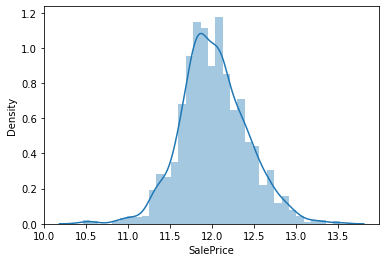

In [102]:
log_sp = np.log1p(df_log['SalePrice'])
sns.distplot(log_sp)

In [113]:
# Original 'SalePrice' & One-Hot Encoding

# One-Hot Encoding
df_ohe = pd.get_dummies(df)


# RMSE 반환 함수
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환 전 RMSE: ', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses


# LinearRegression, Ridge, Lasso
y = df_ohe['SalePrice']
X = df_ohe.drop('SalePrice', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환 전 RMSE:  30178.507
Ridge 로그 변환 전 RMSE:  30048.931
Lasso 로그 변환 전 RMSE:  28992.451


[30178.50718212363, 30048.930745095764, 28992.4512389875]

In [115]:
# Log Transformed 'SalePrice' & One-Hot Encoding

# Log Transformation
df_log['SalePrice'] = np.log1p(df_log['SalePrice'])

# One-Hot Encoding -> df_log_ohe
df_log_ohe = pd.get_dummies(df_log)


# RMSE 반환 함수
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'Log RMSE: ', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses


# LinearRegression, Ridge, Lasso
y = df_log_ohe['SalePrice']
X = df_log_ohe.drop('SalePrice', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression Log RMSE:  0.003
Ridge Log RMSE:  0.003
Lasso Log RMSE:  0.007


[0.002830889906471373, 0.002810407612820868, 0.00657946946686862]

In [112]:
np.expm1(0.12779247779256164)

0.13631716718046977

# Trial & Error

- Categorizing 'SalePrice'

In [ ]:
# 동일 길이 (equal-length buckets categorization)

bin10_el = pd.cut(df['SalePrice'], 10)

gb_el = df['SalePrice'].groupby(bin10_el)

np.round(gb_el.agg(['count', 'mean', 'std', 'min', 'max']), 2)

In [ ]:
bin10_el

In [ ]:
# 동일 개수 (equal-size buckets categorization)

bin10_es = pd.qcut(df['SalePrice'], 10, labels = np.arange(1, 11))

gb_es = df['SalePrice'].groupby(bin10_es)

np.round(gb_es.agg(['count', 'mean', 'std', 'min', 'max']), 2)

In [ ]:
bin10_es

In [ ]:
sns.histplot(np.round(gb_es.agg(['mean'])))

In [ ]:
# # labels = False
# bin10_es = pd.qcut(df['SalePrice'], 10)
# gb_es = df['SalePrice'].groupby(bin10_es)
# np.round(gb_es.agg(['count', 'mean', 'std', 'min', 'max']), 2)

+ KBinsDiscretizer 사용 방법 더 찾아보기

In [ ]:
# from sklearn.preprocessing import KBinsDiscretizer

# price_arr = np.asarray(df['SalePrice']).reshape(-1, 1)

# # strategy = 'quantile' 동일한 개수
# kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile').fit(price_arr)

In [ ]:
# price_cat = kb.transform(price_arr)

In [ ]:
# print(kb.bin_edges_[0])

In [ ]:
# sns.displot(price_cat)

In [ ]:

# # strategy = 'uniform' 동일한 간격
# kb2 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform').fit(total_cost)
# cost_cat2 = kb2.transform(total_cost)
# cost_plot2 = sns.displot(cost_cat2)

## Simple Linear Regression

In [ ]:
# 연속형 변수들와 'SalePrice'의 회귀식
fig, axs = plt.subplots(figsize=(20, 45), ncols=4, nrows=9)

for i, feature in enumerate(num_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='SalePrice', data=df, ax=axs[row][col])

In [ ]:
# encoding하고 나서 할 것
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['SalePrice']
X_data = df.drop(['SalePrice'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                   test_size=0.2, random_state=42)

# LinearRegression OLS
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

In [ ]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)